    LaTeX генератор таблиц:

In [71]:
mass = input().split()
for elem in mass:
    print ("$"+elem+"$ & ", end = "")

203	472	695	922	1150
$203$ & $472$ & $695$ & $922$ & $1150$ & 

    Теперь основная часть:

In [7]:
import matplotlib.pyplot as plt
from math  import sqrt 
from math  import log
from numpy import exp
import numpy as np

    Считаем по МНК:

In [8]:
def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return [k, b, sigma_k, sigma_b]

In [30]:
class Plot:
    
    def __init__(self):
        
        self.dL = sorted (map (float, input().split()))
        self.n  = list (range (len (self.dL)))
        
        self.Ln = self.dL[0]
        self.dL = [i_dL - self.Ln for i_dL in self.dL]
        
        self.k, self.b, self.sigma_k, self.sigma_b = MNK (self.n, self.dL)
        
        print ("dL:", *self.dL, sep = '\t')
        print ("n:",  *self.n,  sep = '\t')
        print ("k = ", self.k, " b = ", self.b)
        print ("Eps k = ", self.sigma_k / self.k, "\nEps b = ", self.sigma_b / self.b, sep = '\t')

In [59]:
def CreatePlot (obj, num, path_name, f):

    fig = plt.figure(figsize = (7, 7))
    ax  = fig.add_subplot(1,1,1)

    const_start = 0
    const_end   = obj.n[-1]

    ax.scatter (obj.n, obj.dL, marker = "+", s = 300, linewidths = 3, color = "red");
    ax.plot ([const_start, const_end], [obj.k * const_start + obj.b, obj.k * const_end + obj.b], color = "blue", linewidth = 3, alpha = 0.5);

    ax.set_title("График $\Delta L (k)$ при $f = $" + str (f[num]) + "кГц", fontsize = 20)
    ax.set_xlabel('$k$', fontsize = 20)
    ax.set_ylabel('$\Delta L$, см', fontsize = 20)

    ax.grid(True)

    plt.savefig ("Picturies/" + path_name + "/" + path_name + str(num) + ".pdf")

17.8	10	2
dL:	0.0	8.0	15.8
n:	0	1	2
k =  7.9  b =  0.033333333333333215
Eps k = 	0.004219409282689509	
Eps b = 	0.8164965809256172

21.6	15.2	8.6	2
dL:	0.0	6.6	13.2	19.6
n:	0	1	2	3
k =  6.540000000000004  b =  0.03999999999999382
Eps k = 	0.003745397160192383	
Eps b = 	0.6846531968767117

21.6	16.2	10.9	5.5	0
dL:	0.0	5.5	10.9	16.2	21.6
n:	0	1	2	3	4
k =  5.390000000000001  b =  0.05999999999999872
Eps k = 	0.0027518361733250363	
Eps b = 	0.3496029493907798

20	15.2	10.5	5.7	1
dL:	0.0	4.7	9.5	14.2	19.0
n:	0	1	2	3	4
k =  4.75  b =  -0.019999999999999574
Eps k = 	0.001630729829989826	
Eps b = 	-0.5477225575077828

22.7	19.1	15.6	12.1	8.5	4.9	1.3
dL:	0.0	3.6000000000000005	7.2	10.799999999999999	14.299999999999999	17.8	21.4
n:	0	1	2	3	4	5	6
k =  3.560714285714287  b =  0.04642857142856727
Eps k = 	0.00211074937134302	
Eps b = 	0.323756480496797

22.2	19.1	16.1	13	10	6.9	3.8	0.7
dL:	0.0	3.0999999999999996	6.2	9.3	12.3	15.400000000000002	18.400000000000002	21.5
n:	0	1	2	3	4	5	6	7
k =  3.06666

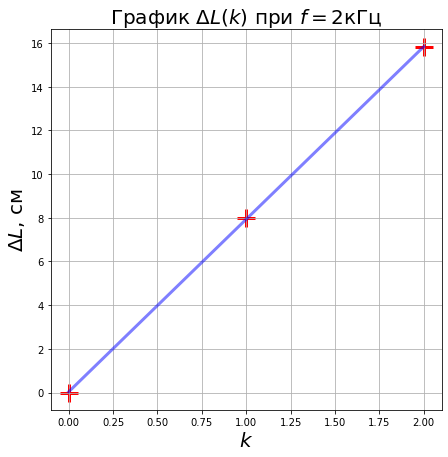

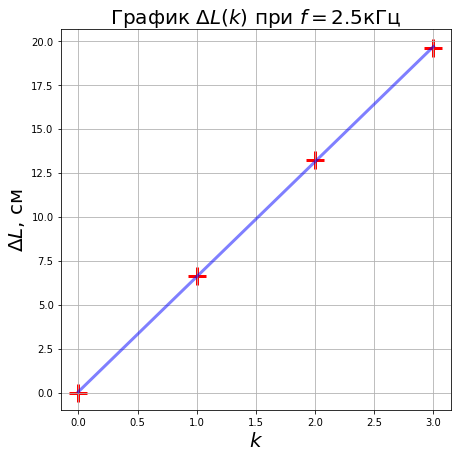

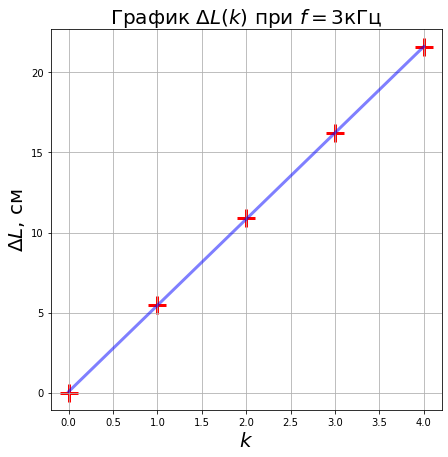

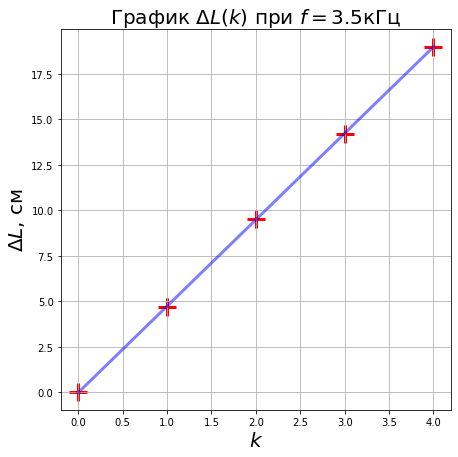

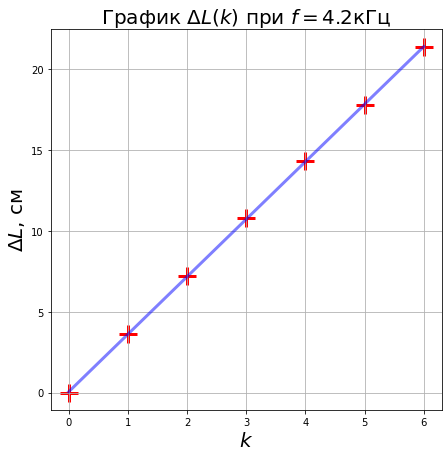

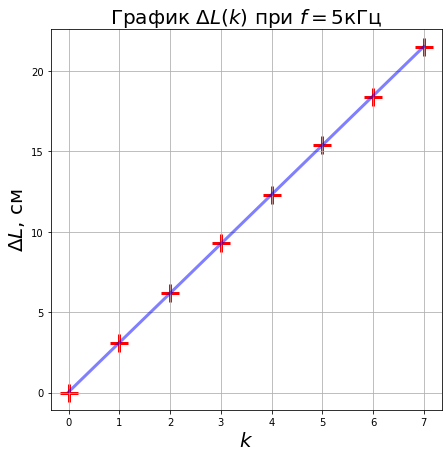

In [60]:
f = [2, 2.5, 3, 3.5, 4.2, 5] # frequency 

for i in range (len (f)):
    new_obj = Plot ()
    CreatePlot (new_obj, i, "air", f) # air or co2
    print() # newline

22.4	15.7	9.1	2.7
dL:	0.0	6.3999999999999995	13.0	19.7
n:	0	1	2	3
k =  6.570000000000002  b =  -0.0800000000000054
Eps k = 	0.005161590550317627	
Eps b = 	-0.4739297152526377

17.9	12	6	0.4
dL:	0.0	5.6	11.6	17.5
n:	0	1	2	3
k =  5.849999999999999  b =  -0.09999999999999787
Eps k = 	0.007150940397729698	
Eps b = 	-0.46770717334691975

21.9	16.8	11.8	7	2.2
dL:	0.0	4.8	9.600000000000001	14.600000000000001	19.7
n:	0	1	2	3	4
k =  4.920000000000002  b =  -0.1000000000000032
Eps k = 	0.006297533896264881	
Eps b = 	-0.43817804600360827

19.9	15.8	11.5	7.4	3.5
dL:	0.0	3.9000000000000004	8.0	12.3	16.4
n:	0	1	2	3	4
k =  4.119999999999999  b =  -0.11999999999999744
Eps k = 	0.007200192705924265	
Eps b = 	-0.3496029493903563

22.7	18.8	15.2	11.6	8.2	4.5	1
dL:	0.0	3.5	7.199999999999999	10.6	14.2	17.8	21.7
n:	0	1	2	3	4	5	6
k =  3.5964285714285715  b =  -0.07500000000000107
Eps k = 	0.00589888576714673	
Eps b = 	-0.5657312350015878



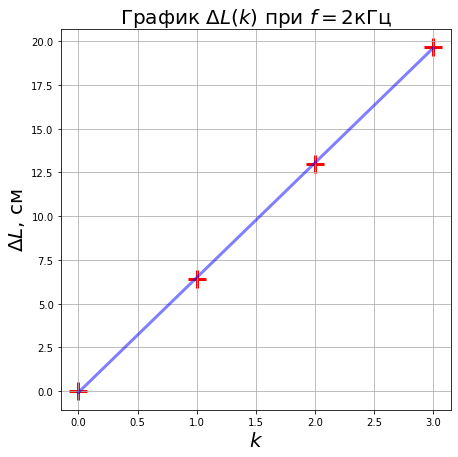

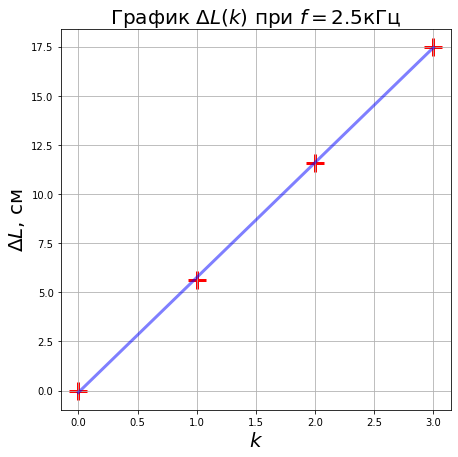

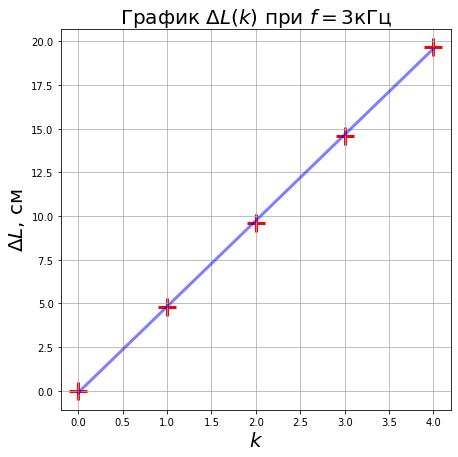

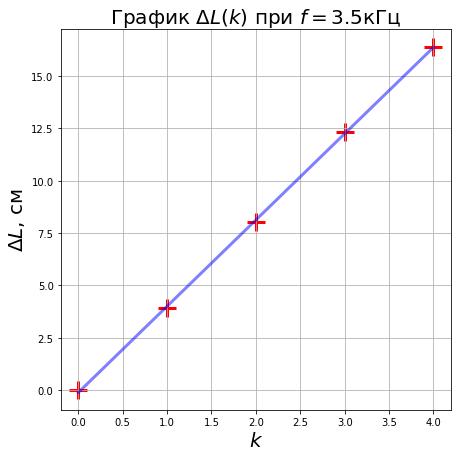

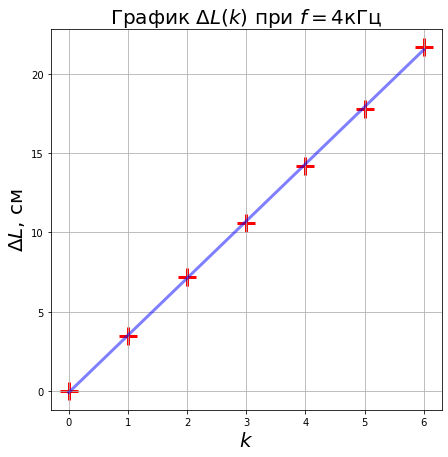

In [66]:
f = [2, 2.5, 3, 3.5, 4] # frequency 

for i in range (len (f)):
    new_obj = Plot ()
    CreatePlot (new_obj, i, "co2", f) # air or co2
    print() # newline